# 6.2: Exploring Relationships

# This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
     Boxplots
     Horizental Bar Charts
     Pie Charts
     Pivot Table Heatmap
    

## 1. Importing Visualization Libraries and Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Import path and cleaned E-commerce Cosmetic Products dataset
path = r'E:\E-commerce Cosmetic Products'
df_cosmetic = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cosmetic_clean.csv'))

# 2.Exploring Relationships

## Correlations Heatmap

In [3]:
df_cosmetic.columns

Index(['Unnamed: 0', 'website', 'country', 'category', 'subcategory', 'price',
       'brand', 'form', 'type', 'rating', 'count of ratings'],
      dtype='object')

In [4]:
Col_keep=['website', 'country', 'category', 'subcategory', 'price',
       'brand', 'form', 'type', 'rating', 'count of ratings']
df_cosmetic=df_cosmetic[Col_keep]

In [5]:
df_cosmetic.columns

Index(['website', 'country', 'category', 'subcategory', 'price', 'brand',
       'form', 'type', 'rating', 'count of ratings'],
      dtype='object')

In [6]:
# Price unit is in INR and must convert to dollor, ith considerin 1 INR=0.012 $
# Convert 'Price' from INR to USD
df_cosmetic['price'] = df_cosmetic['price'] * 0.012

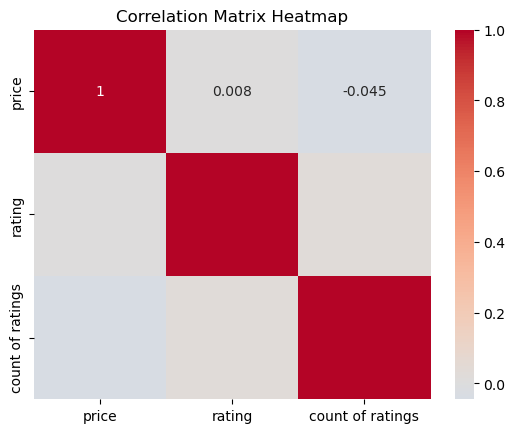

In [7]:
# Select only numeric columns
numeric_df = df_cosmetic.select_dtypes(include=[np.number])

# Create a correlation matrix
corr_matrix = numeric_df.corr()

# Generate a heatmap
heatmap_fig=sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Interpretation:
The heatmap shows the correlation coefficients between the numerical variables in the dataset. Coefficients closer to 1 or -1 indicate strong positive or negative correlations, respectively. For instance, "price" and "rating" have a weak correlation, it doesnt means higher-priced products tend to have higher ratings.

## Scatterplot for Strongest Correlations

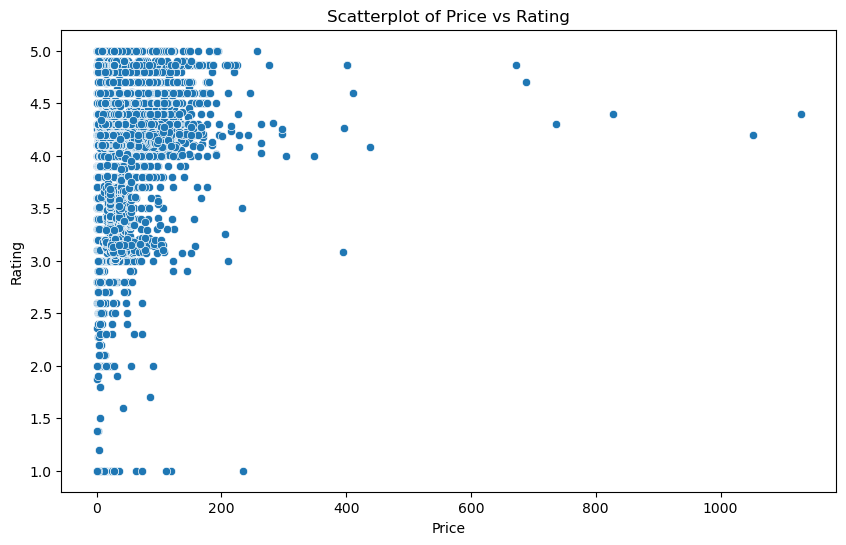

In [8]:
# Scatterplot for 'price' vs 'rating'
plt.figure(figsize=(10, 6))
scatter_fig_1=sns.scatterplot(data=df_cosmetic, x='price', y='rating')
plt.title('Scatterplot of Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

#### Interpretation:
The scatterplot helps visualize the relationship between "price" and "rating". more Ratings for the lower price is observed.

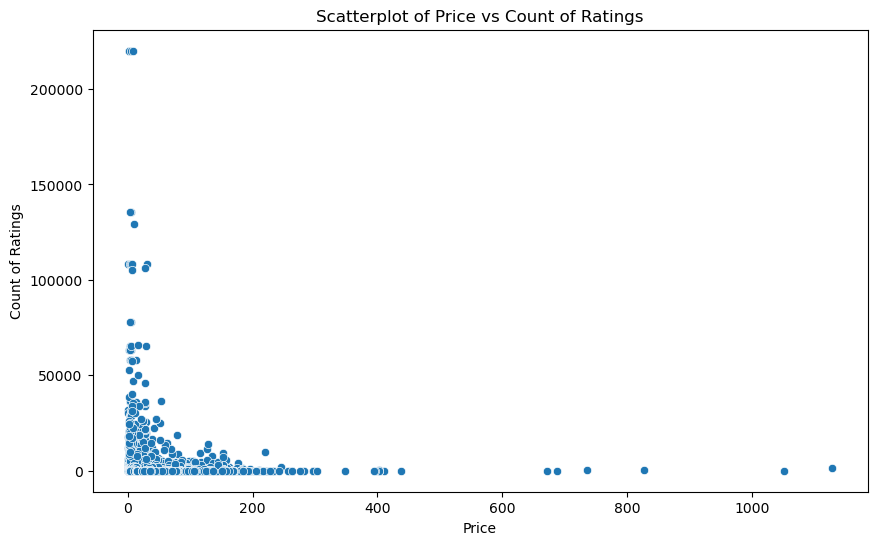

In [9]:
# Scatterplot for 'price' vs 'count of ratings'
plt.figure(figsize=(10, 6))
scatter_fig_2=sns.scatterplot(data=df_cosmetic, x='price', y='count of ratings')
plt.title('Scatterplot of Price vs Count of Ratings')
plt.xlabel('Price')
plt.ylabel('Count of Ratings')
plt.show()

#### Interpretation:
The scatterplot helps visualize the relationship between "price" and "count of ratings". more counts of ratings for lower prices are observed.

## Pair Plots

C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


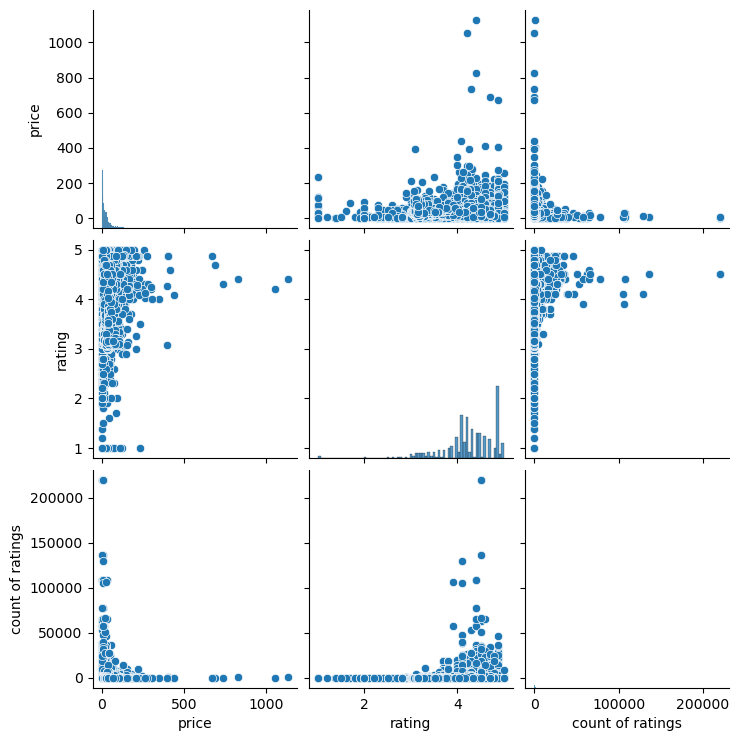

In [10]:
# Pair plot
pairplot_fig=sns.pairplot(df_cosmetic)
plt.show()

#### Interpretation:
The pair plot provides an overview of the distributions and relationships between multiple variables in the dataset. Diagonal plots show the distribution of each variable, while off-diagonal plots show relationships between pairs of variables. Ouliers for the higher price are observed.

## Categorical Plots

C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


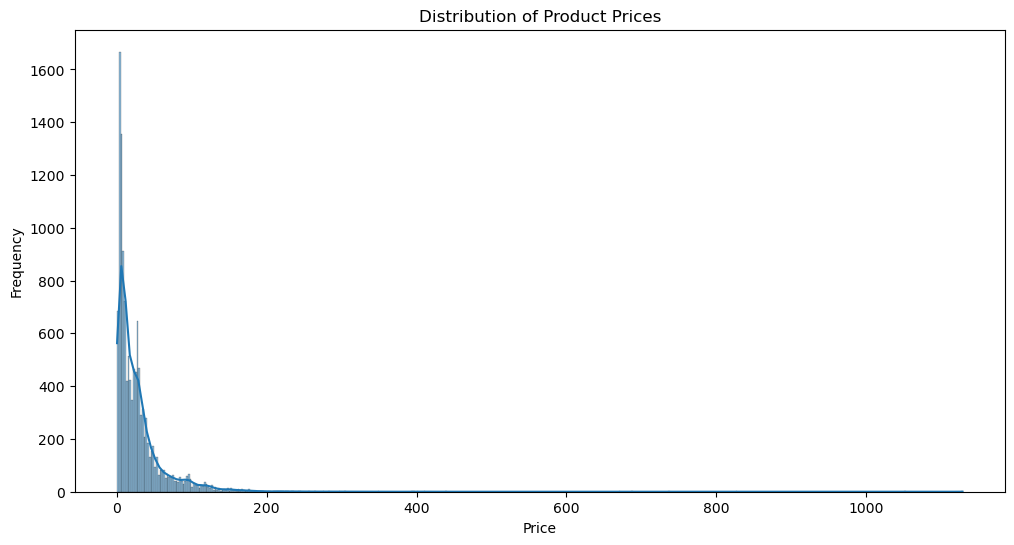

In [11]:
# Histogram with KDE to visualize price distribution
plt.figure(figsize=(12, 6))
categorical_fig=sns.histplot(df_cosmetic['price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Boxplot

C:\Users\negar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


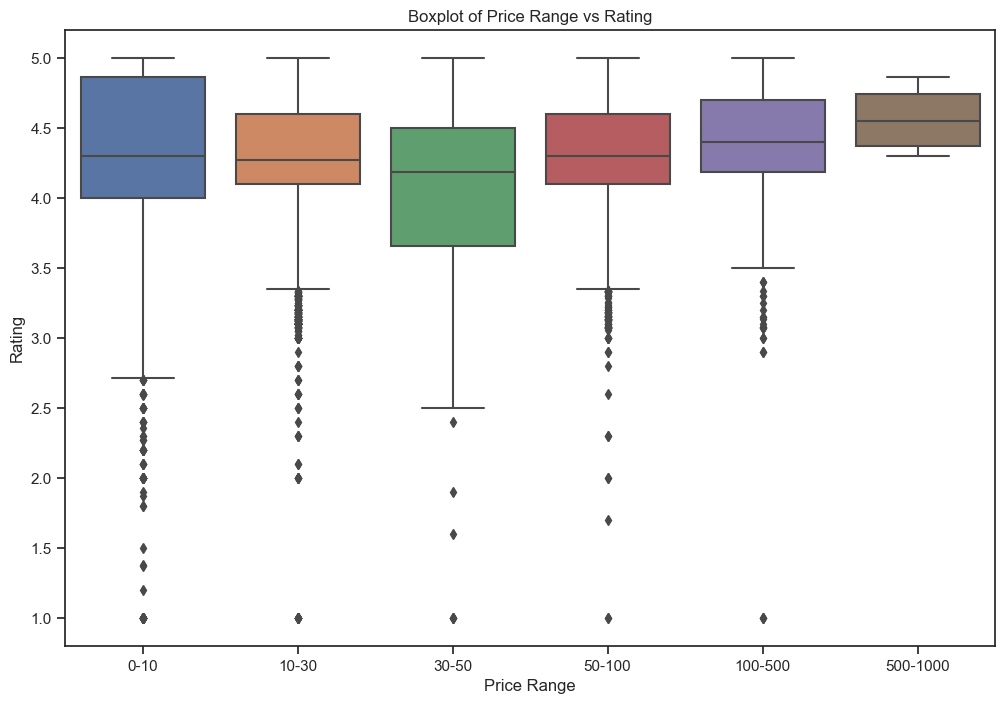

In [17]:
# Define price ranges
bins = [0, 10, 30, 50, 100, 500, 1000]
labels = ['0-10', '10-30', '30-50', '50-100', '100-500', '500-1000']
df_cosmetic['price_range'] = pd.cut(df_cosmetic['price'], bins=bins, labels=labels)

# Boxplot for 'price_range' vs 'rating'
plt.figure(figsize=(12, 8))
boxplot_fig=sns.boxplot(x='price_range', y='rating', data=df_cosmetic)
plt.title('Boxplot of Price Range vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.savefig('boxplot_price_rating.png')
plt.show()


#### Interpretation:
This boxplot visualizes the distribution of ratings across different price ranges.the price between (0-50) are mosttrends.

In [18]:
# Defining price categories based on the distribution
df_cosmetic.loc[df_cosmetic['price'] < 10, 'Price category'] = 'Very Low Price'
df_cosmetic.loc[(df_cosmetic['price'] >= 10) & (df_cosmetic['price'] < 30), 'Price category'] = 'Low Price'
df_cosmetic.loc[(df_cosmetic['price'] >= 30) & (df_cosmetic['price'] < 50), 'Price category'] = 'Middle Price'
df_cosmetic.loc[(df_cosmetic['price'] >= 50) & (df_cosmetic['price'] < 100), 'Price category'] = 'High Price'
df_cosmetic.loc[(df_cosmetic['price'] >= 100) & (df_cosmetic['price'] < 500), 'Price category'] = 'Very High Price'
df_cosmetic.loc[df_cosmetic['price'] >= 500, 'Price category'] = 'Luxury Price'

# Handling NaN values
df_cosmetic['Price category'].fillna('Unknown', inplace=True)


In [19]:
df_cosmetic['Price category'].value_counts(dropna = False)

Price category
Very Low Price     4880
Low Price          4008
Middle Price       1927
High Price         1291
Very High Price     503
Luxury Price          6
Name: count, dtype: int64

C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


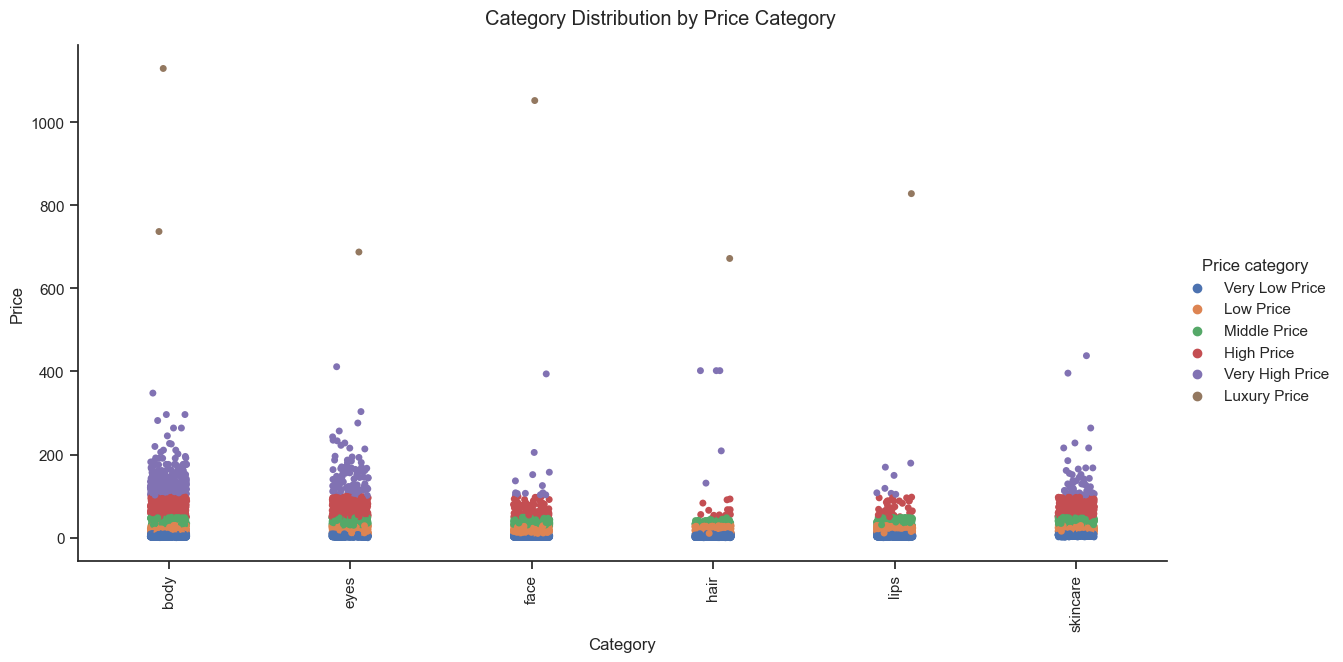

In [20]:
# Setting the aesthetic style of the plots
sns.set(style="ticks")

# Creating the categorical plot
g = sns.catplot(x="category", y="price", hue="Price category", data=df_cosmetic, kind="strip", height=6, aspect=2)
categorical_plot=g
# Adjusting the plot labels and title
g.set_axis_labels("Category", "Price")
g.fig.suptitle("Category Distribution by Price Category", y=1.03)
plt.xticks(rotation=90)  # Rotate x labels if there are many brands

# Display the plot
plt.show()
# Save the pie charts
plt.savefig('categorical_plot_price.png')
plt.close()


C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\negar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


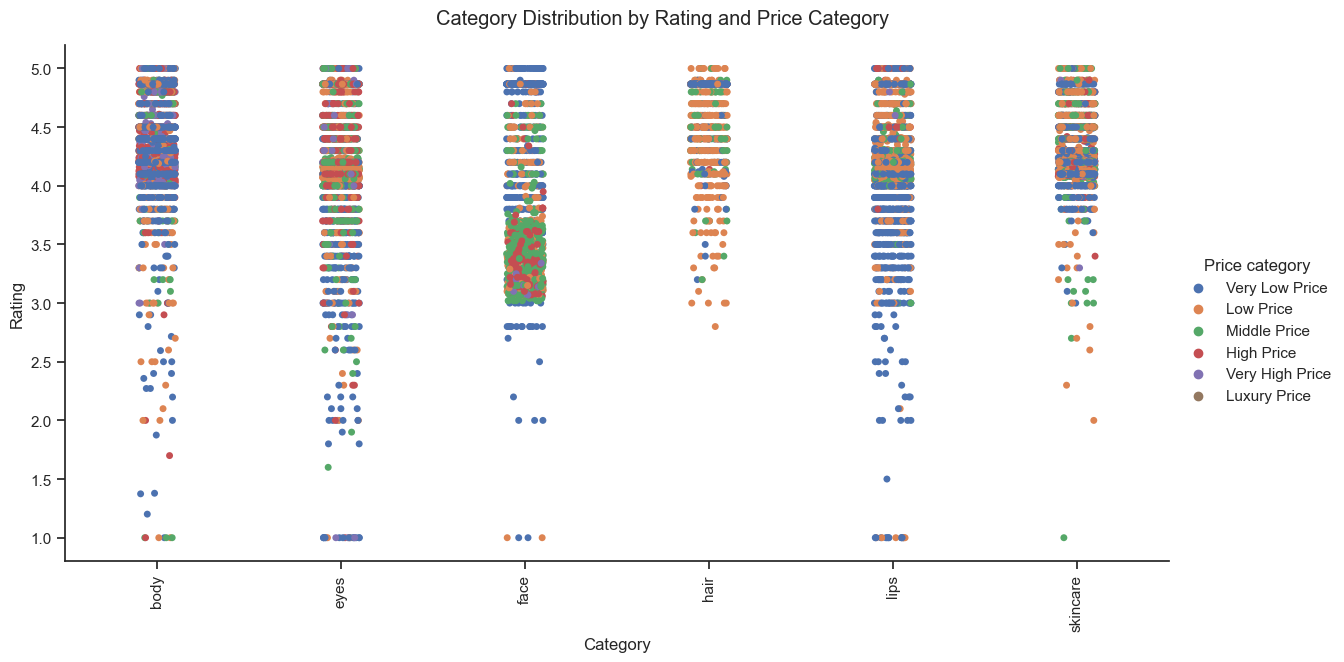

In [22]:
# Setting the aesthetic style of the plots
sns.set(style="ticks")

# Creating the categorical plot
g_1 = sns.catplot(x="category", y="rating", hue="Price category", data=df_cosmetic, kind="strip", height=6, aspect=2)
categorical_plot=g
# Adjusting the plot labels and title
g_1.set_axis_labels("Category", "Rating")
g_1.fig.suptitle("Category Distribution by Rating and Price Category", y=1.03)
plt.xticks(rotation=90)  # Rotate x labels if there are many brands

# Display the plot
plt.show()
# Save the pie charts
plt.savefig('subcategorical_plot_rating.png')
plt.close()


In [23]:
df_cosmetic.head()

,website,country,category,subcategory,price,brand,form,type,rating,count of ratings,price_range,Price category
0,Flipkart,India,body,perfume,7.188,Carlton London,aerosol,all,3.9,19,0-10,Very Low Price
1,Flipkart,India,body,perfume,1.788,Charlene,aerosol,all,4.4,4031,0-10,Very Low Price
2,Flipkart,India,body,perfume,3.576,Charlene,aerosol,all,4.4,4072,0-10,Very Low Price
3,Flipkart,India,body,perfume,2.940,Denver,aerosol,all,4.2,61,0-10,Very Low Price
4,Flipkart,India,body,perfume,5.064,Denver,aerosol,all,4.3,342,0-10,Very Low Price


In [24]:
# Group by category and subcategory and calculate the mean price in each subcategory
subcategory_price_mean = df_cosmetic.groupby(['category', 'subcategory'])['price'].mean().reset_index()

# Sort the result by the mean price in each subcategory in descending order
subcategory_price_mean_sorted = subcategory_price_mean.sort_values(by='price', ascending=False)

# Display the sorted result
print(subcategory_price_mean_sorted)


    category    subcategory      price
2       body        perfume  63.820274
1       body    moisturizer  59.321460
34  skincare  eye treatment  52.861790
37  skincare    moisturizer  44.713857
18      face    highlighter  42.612267
9       eyes      eyeshadow  40.199820
20      face         primer  39.112735
10      eyes        mascara  37.080254
16      face       face oil  34.698750
15      face  eye treatment  31.478676
4       body      sunscreen  30.848448
7       eyes      eyelashes  29.902200
38  skincare          serum  28.034568
36  skincare           mask  27.780531
24      hair    hairstyling  27.442000
33  skincare       cleanser  27.182105
26      hair          serum  26.099086
13      face          blush  25.585995
35  skincare      face wash  25.142988
21      hair    conditioner  22.823280
14      face      concealer  22.822294
40  skincare          toner  22.383277
6       eyes        eyebrow  21.229739
19      face         powder  20.181558
5       eyes     eye prim

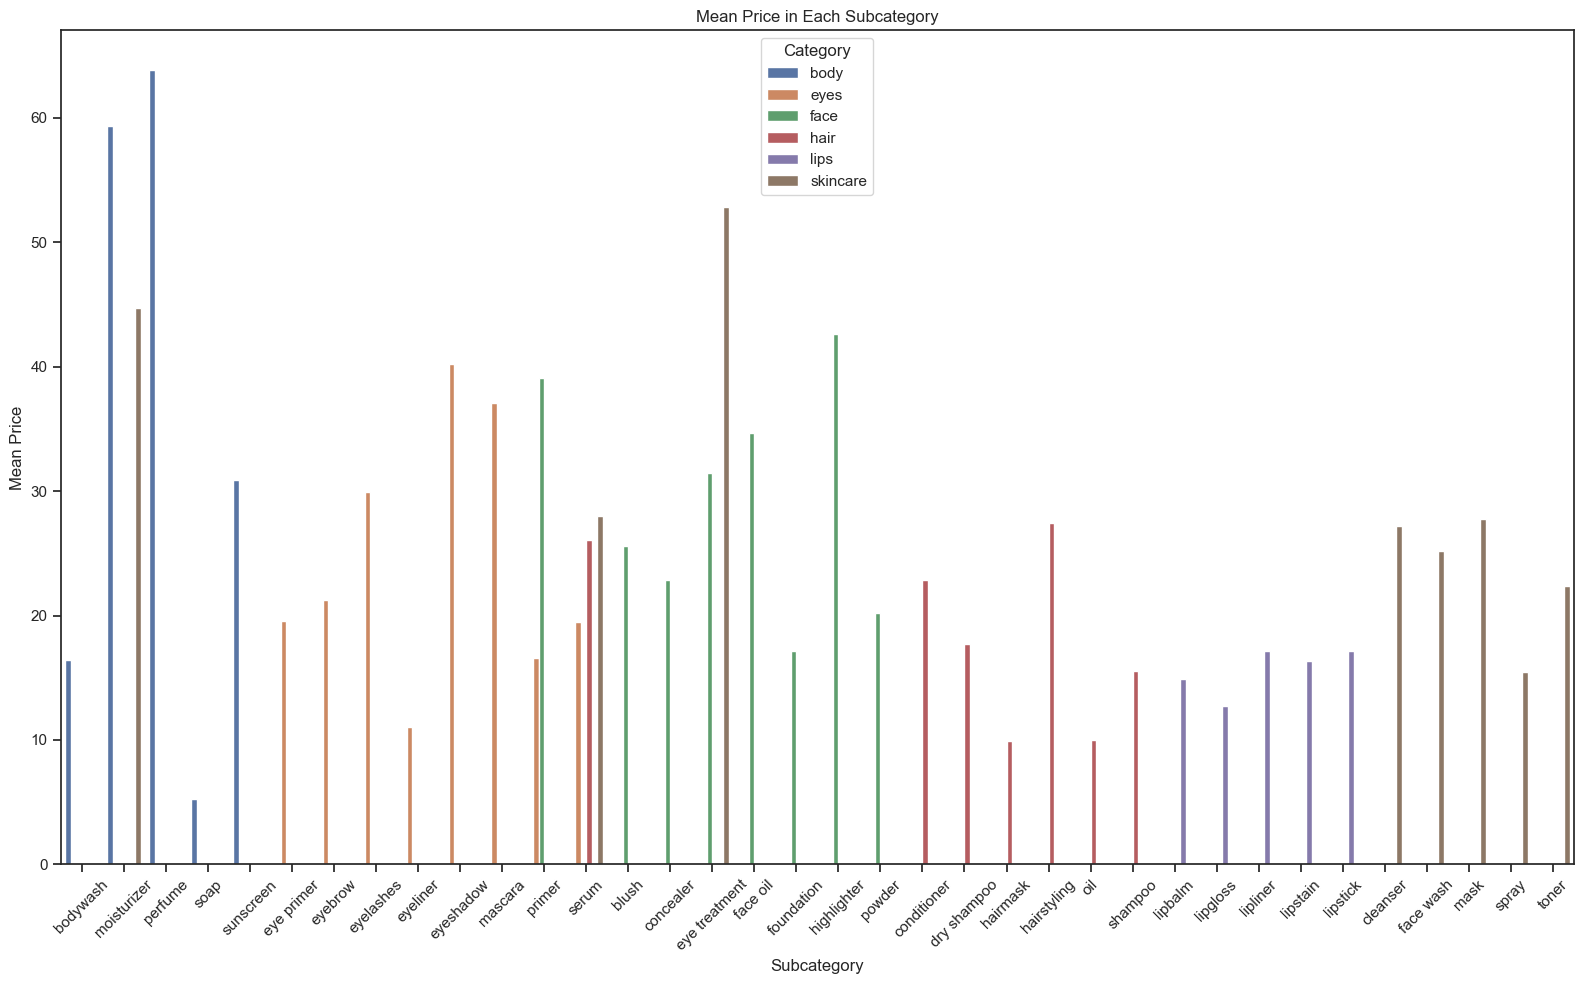

In [29]:
# Plotting
plt.figure(figsize=(16, 10))
subcategory_fig=sns.barplot(x='subcategory', y='price', hue='category', data=subcategory_price_mean)
plt.title('Mean Price in Each Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()
# Save the pie charts
plt.savefig('subcategorical_plot_price.png')
plt.close()


In [30]:
# Group by category and subcategory and calculate the mean rating in each subcategory
subcategory_rating_mean = df_cosmetic.groupby(['category', 'subcategory'])['rating'].mean().reset_index()

# Sort the result by the mean rating in each subcategory in descending order
subcategory_rating_mean_sorted = subcategory_rating_mean.sort_values(by='rating', ascending=False)

# Display the sorted result
print(subcategory_rating_mean_sorted)


    category    subcategory    rating
23      hair       hairmask  4.866494
25      hair            oil  4.866494
1       body    moisturizer  4.650000
27      hair        shampoo  4.631303
26      hair          serum  4.481679
35  skincare      face wash  4.475581
12      eyes          serum  4.475000
39  skincare          spray  4.473333
10      eyes        mascara  4.472230
24      hair    hairstyling  4.433333
0       body       bodywash  4.429680
2       body        perfume  4.362176
34  skincare  eye treatment  4.350137
4       body      sunscreen  4.346667
33  skincare       cleanser  4.323630
3       body           soap  4.318974
36  skincare           mask  4.318023
37  skincare    moisturizer  4.317351
38  skincare          serum  4.310454
40  skincare          toner  4.305469
21      hair    conditioner  4.298033
31      lips       lipstain  4.268000
19      face         powder  4.237209
30      lips       lipliner  4.200515
15      face  eye treatment  4.190000
28      lips

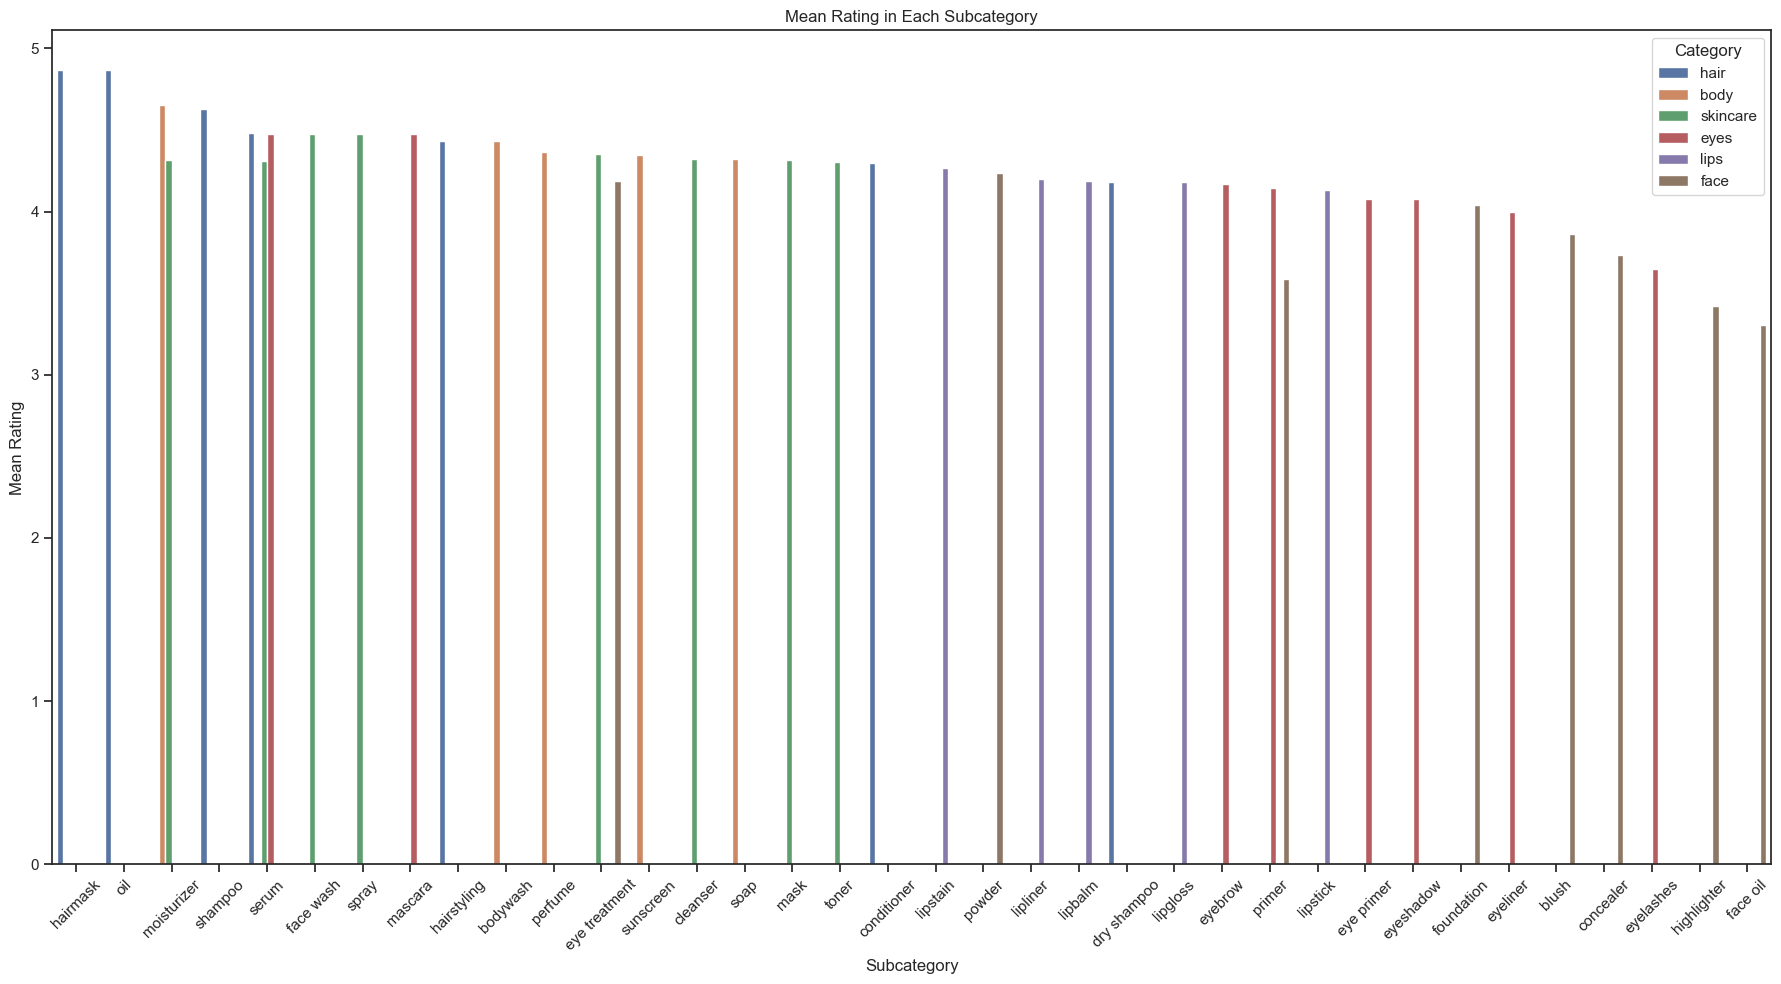

In [31]:

# Plotting
plt.figure(figsize=(18, 10))
subcategory_fig = sns.barplot(x='subcategory', y='rating', hue='category', data=subcategory_rating_mean_sorted)
plt.title('Mean Rating in Each Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('subcategorical_plot_rating.png')
plt.close()


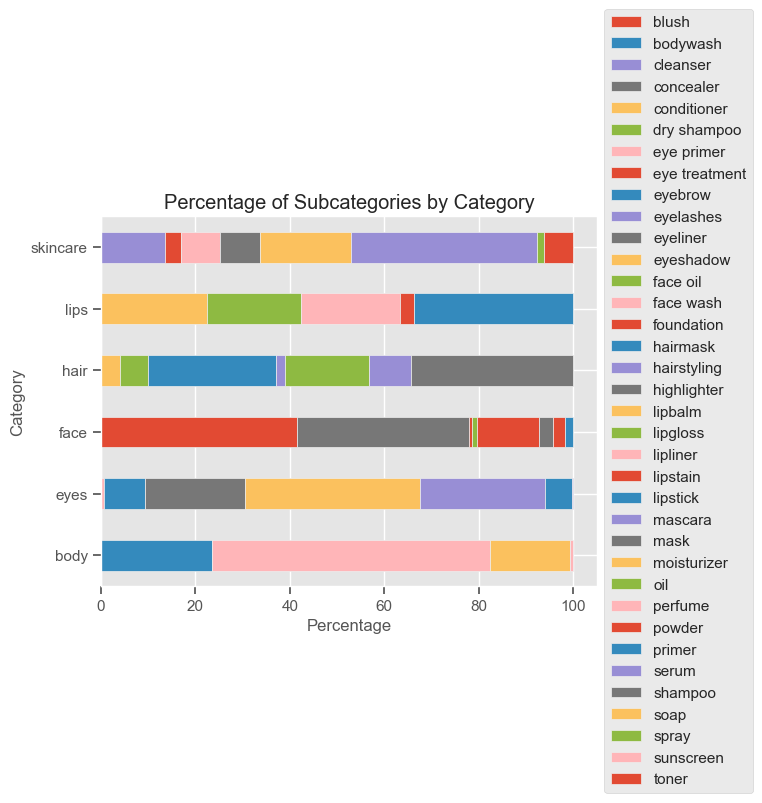

In [47]:
# Group by category and subcategory and count the number of products in each subcategory
df=df_cosmetic
df_grouped = df.groupby(['category', 'subcategory']).size().reset_index(name='counts')

# Group by category and count the total number of products in each category
df_category = df.groupby('category').size().reset_index(name='total_counts')

# Merge the two dataframes to calculate the percentage of subcategories in each category
df_merged = pd.merge(df_grouped, df_category, on='category')
df_merged['percentage'] = (df_merged['counts'] / df_merged['total_counts']) * 100

# Pivot the dataframe to create a multi-level index
df_pivot = df_merged.pivot(index='category', columns='subcategory', values='percentage')

# Plot a horizontal stacked bar chart
fig, ax = plt.subplots()
horizontal_bar_chart_fig=df_pivot.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Percentage')
ax.set_ylabel('Category')
ax.set_title('Percentage of Subcategories by Category')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('category_subcategory.png')
# Display the plot
plt.show()


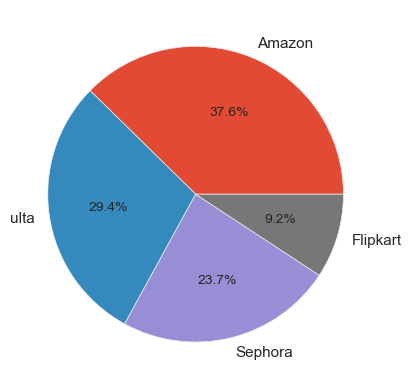

In [49]:
df_cosmetic['website'] = df_cosmetic['website'].str.replace('sephora', 'Sephora')
# Calculate the website share
website_share = df_cosmetic['website'].value_counts()

# Set the style
plt.style.use('ggplot')

# Create the pie chart
plt.figure()
plt.pie(website_share, labels=website_share.index, autopct="%1.1f%%")

# Save the pie chart
plt.savefig('website_piechart.png')

# Show the pie chart
plt.show()

# Close the figure
plt.close()


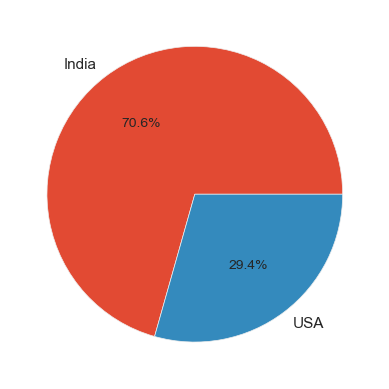

In [50]:
# Calculate the value counts for the 'country' column
country_share = df_cosmetic['country'].value_counts()

# Set the plot style
plt.style.use('ggplot')

# Set the figure size
plt.figure()

# Create the pie chart
pie_country_fig = plt.pie(country_share, labels=country_share.index, autopct="%1.1f%%")

# Show the plot

plt.savefig('pie_country.png')
plt.show()
plt.close()

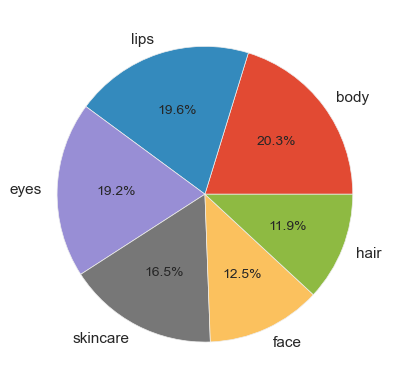

In [51]:
# category
category_share = df_cosmetic['category'].value_counts()

plt.figure()
# Create the pie chart
plt.pie(category_share, labels=category_share.index, autopct="%1.1f%%")
# Show the plot
plt.savefig('pie_category_fig.png')
plt.show()
plt.close()


C:\Users\negar\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


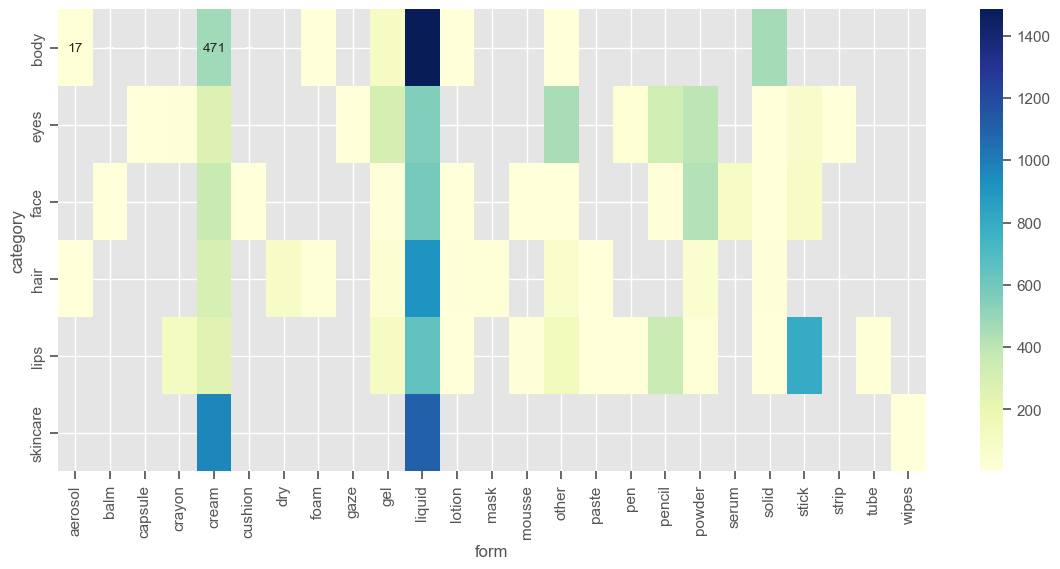

In [36]:
# create a pivot table to count the number of products in each category-form combination

pivot_table = pd.pivot_table(df, index='category', columns='form', values='subcategory', aggfunc='count')

# Set the figure size
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the heatmap on the adjusted figure size
pivot_table_heatmap= sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', ax=ax)

# Show the plot
plt.show()

In [37]:

# Save the correlation matrix heatmap plot
heatmap_fig.figure.savefig('correlation_matrix_heatmap.png')

# Save the scatterplot(s) for the variables with the strongest correlations
scatter_fig_1.figure.savefig('scatterplot_rating.png')
scatter_fig_2.figure.savefig('scatterplot_countofrating.png')

# Save the pair plot of the entire data set
pairplot_fig.figure.savefig('pairplot.png')

# Save the categorical plot
categorical_plot.figure.savefig('categorical_plot.png')

# Save the horizontal stacked bar chart
horizontal_bar_chart_fig.figure.savefig('horizontal_stacked_bar_chart.png')

# Save the heatmap of the pivot table
pivot_table_heatmap.figure.savefig('pivot_table_heatmap.png')






### Revisiting Questions and Hypotheses
#### New Questions:
1. Do specific subcategories consistently have higher ratings?
2. Is there a significant difference in ratings between products from different countries?
#### Hypotheses:
1. Lowerr-priced products have higher average ratings.
2. Certain brands consistently receive higher ratings than others.